# BANK MARKETING 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time,datetime

#Escape warnings
import warnings 
warnings.filterwarnings('ignore')

#Model Libraries 
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Data Science\Banking Dataset\bank-additional-full 1.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [8]:
#Mapping
df['default'] = df['default'].map({'yes':1 ,'no':0}) 

In [9]:
df['housing'] = df['housing'].map( 
                   {'yes':1 ,'no':0}) 
df['loan'] = df['loan'].map( 
                   {'yes':1 ,'no':0}) 
df['y'] = df['y'].map( 
                   {'yes':1 ,'no':0})

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# DATA CLEANING

In [11]:
df.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [12]:
df.dropna(subset=['default'],axis=0,inplace=True)

In [13]:
df.dropna(subset=['housing'],axis=0,inplace=True)

In [14]:
df.dropna(subset=['loan'],axis=0,inplace=True)

In [15]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## DATA EXPLORATION

In [16]:
df.y.value_counts()

0    27727
1     4101
Name: y, dtype: int64

In [17]:
df.loan.value_counts()

0.0    26852
1.0     4976
Name: loan, dtype: int64

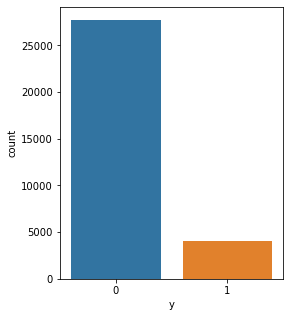

In [18]:
plt.figure(figsize=(4,5))
sns.countplot(x="y",data=df,palette=None)
plt.xlabel('y')
plt.show()

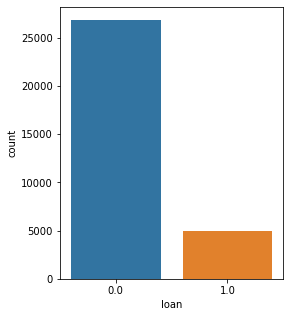

In [19]:
plt.figure(figsize=(4,5))
sns.countplot(x="loan",data=df,palette=None)
plt.xlabel("loan")
plt.show()

### From above graph we can conclude that more than 80% of people can't have a loan.

In [20]:
df.corr()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.002952,0.001855,-0.010697,0.006673,-0.003552,-0.047451,0.045727,-0.050516,-0.037416,0.128179,-0.036070,-0.063312,0.049509
default,0.002952,1.000000,-0.004042,-0.004180,-0.005820,-0.004247,0.002097,0.002462,0.005896,-0.002674,0.005056,0.006779,0.007342,-0.003734
housing,0.001855,-0.004042,1.000000,0.048100,-0.005556,-0.010645,-0.008941,0.021801,-0.059090,-0.077684,-0.036028,-0.058593,-0.044660,0.012092
loan,-0.010697,-0.004180,0.048100,1.000000,0.006590,0.007080,0.001108,-0.002590,-0.000403,-0.003943,-0.019042,-0.002468,0.003246,-0.004687
duration,0.006673,-0.005820,-0.005556,0.006590,1.000000,-0.069414,-0.049664,0.022038,-0.024539,0.011985,-0.008426,-0.030549,-0.042165,0.392781
campaign,-0.003552,-0.004247,-0.010645,0.007080,-0.069414,1.000000,0.055095,-0.081586,0.157996,0.126974,-0.015297,0.141503,0.149157,-0.070430
pdays,-0.047451,0.002097,-0.008941,0.001108,-0.049664,0.055095,1.000000,-0.595253,0.270975,0.066006,-0.104194,0.299676,0.375674,-0.331982
previous,0.045727,0.002462,0.021801,-0.002590,0.022038,-0.081586,-0.595253,1.000000,-0.403229,-0.170472,-0.022335,-0.441080,-0.492733,0.234616
emp.var.rate,-0.050516,0.005896,-0.059090,-0.000403,-0.024539,0.157996,0.270975,-0.403229,1.000000,0.765002,0.142321,0.969109,0.899383,-0.309622
cons.price.idx,-0.037416,-0.002674,-0.077684,-0.003943,0.011985,0.126974,0.066006,-0.170472,0.765002,1.000000,0.015546,0.664338,0.484643,-0.130693


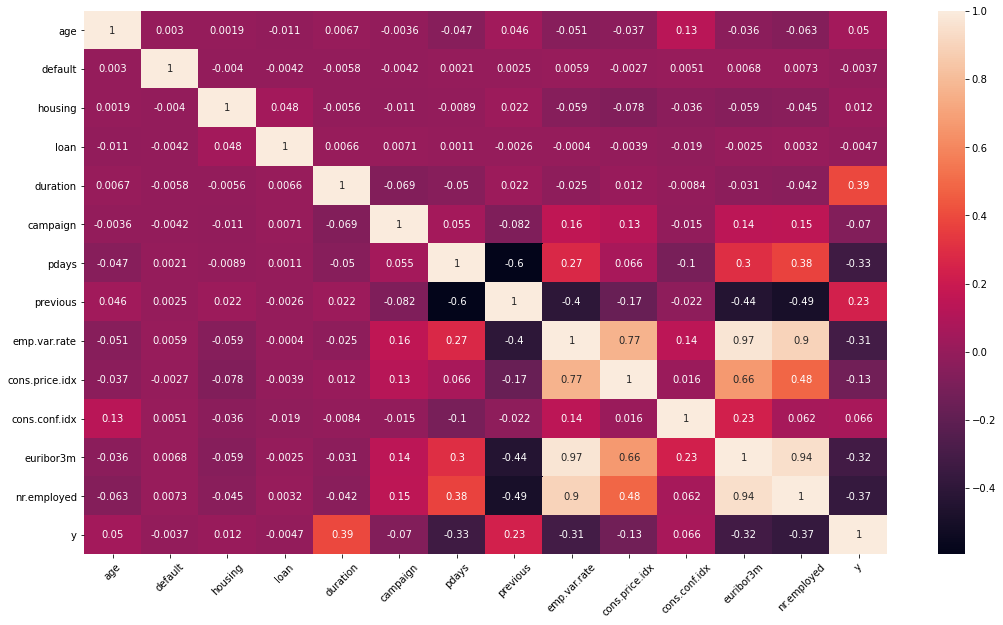

In [21]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45);

In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


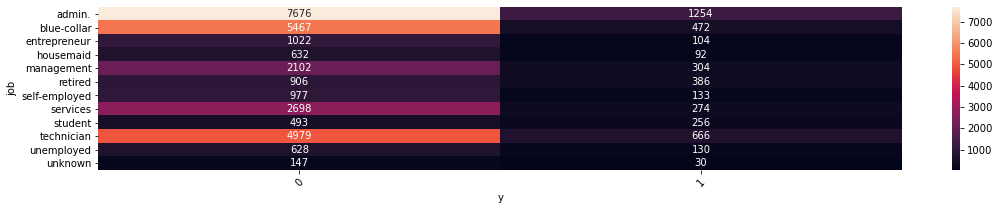

In [23]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=df['job'], columns=df['y']), annot=True, 
            fmt='g')
plt.xticks(rotation=45);

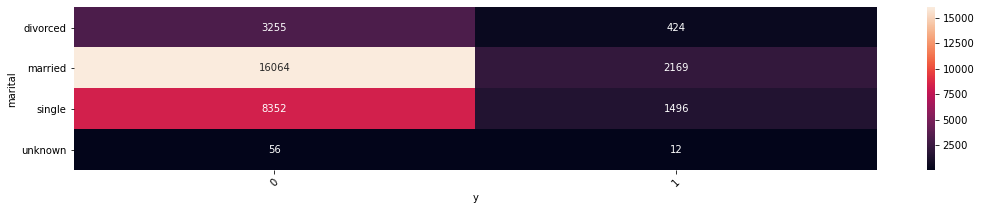

In [24]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=df['marital'], columns=df['y']), annot=True, 
            fmt='g')
plt.xticks(rotation=45);

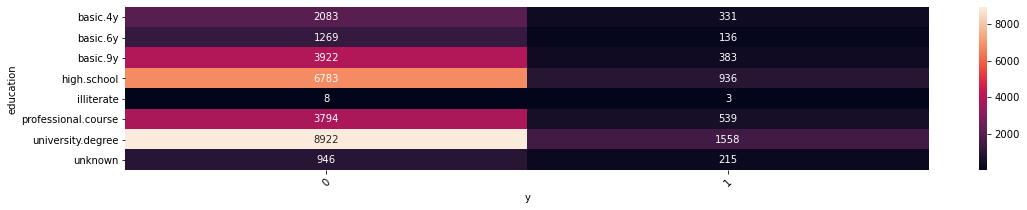

In [25]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=df['education'], columns=df['y']), annot=True, 
            fmt='g')
plt.xticks(rotation=45);

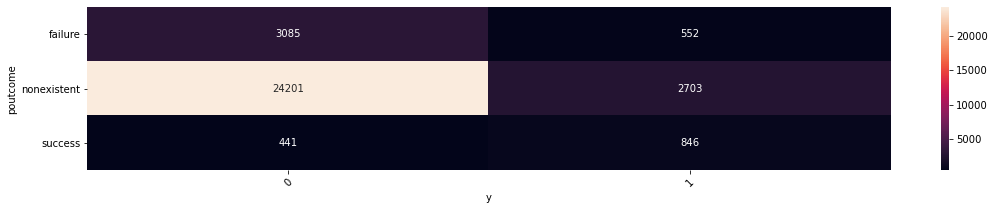

In [26]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=df['poutcome'], columns=df['y']), annot=True, 
            fmt='g')
plt.xticks(rotation=45);

In [27]:
#Groupingby target 
df.groupby('y').mean()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,
0,38.948137,0.000108,0.538464,0.156995,220.540051,2.592960,980.917914,0.150575,0.110813,93.554046,-40.691506,3.667780,5170.776766
1,40.496708,0.000000,0.556450,0.151914,526.978786,2.022921,777.912948,0.522799,-1.383175,93.324793,-39.740454,1.961443,5087.539015


In [28]:
df.groupby('age')['y'].value_counts()

age  y
17   0     3
     1     1
18   0    15
     1    12
19   0    19
          ..
91   0     2
92   1     2
     0     1
94   0     1
95   0     1
Name: y, Length: 149, dtype: int64

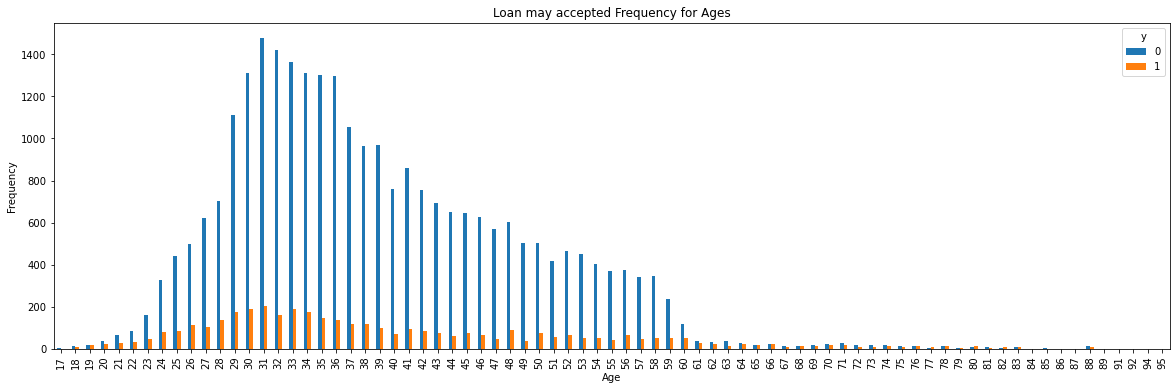

In [29]:
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,6))
plt.title('Loan may accepted Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

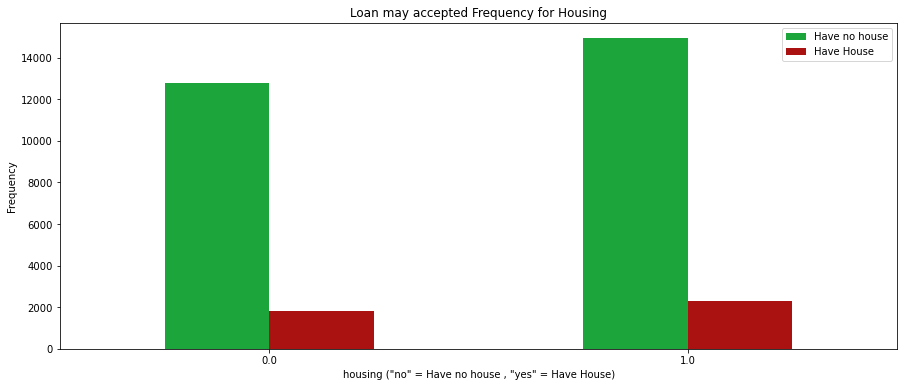

In [30]:
pd.crosstab(df.housing,df.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Loan may accepted Frequency for Housing')
plt.xlabel('housing ("no" = Have no house , "yes" = Have House)')
plt.xticks(rotation=0)
plt.legend(["Have no house", "Have House"])
plt.ylabel('Frequency')
plt.show()

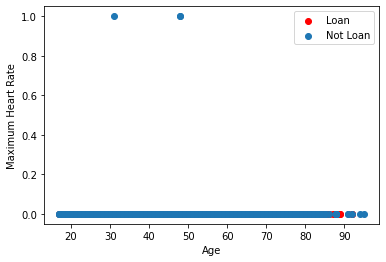

In [31]:
plt.scatter(x=df.age[df.y== 1], y=df.default[(df.y== 1)], c="red")
plt.scatter(x=df.age[df.y== 0], y=df.default[(df.y== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

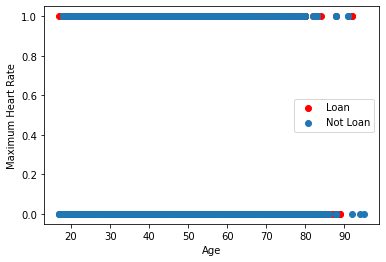

In [32]:
plt.scatter(x=df.age[df.y== 1], y=df.loan[(df.y== 1)], c="red")
plt.scatter(x=df.age[df.y== 0], y=df.loan[(df.y== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

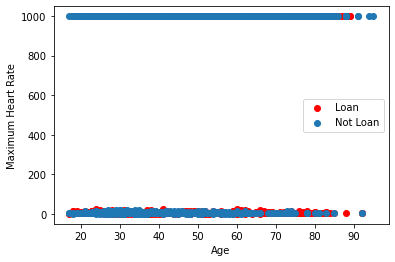

In [33]:
plt.scatter(x=df.age[df.y== 1], y=df.pdays[(df.y== 1)], c="red")
plt.scatter(x=df.age[df.y== 0], y=df.pdays[(df.y== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [35]:
df = df.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
df.head()

,age,default,housing,loan,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.0,0.0,0.0,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.0,1.0,0.0,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.0,0.0,0.0,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.0,0.0,1.0,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0.0,0.0,0.0,mon,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


## Creating Model

In [36]:
#Splitting data in x & y_data 
y = df.y.values
x = df.drop(['y'], axis = 1)

In [37]:
x=x.drop(columns=['day_of_week'],axis=0)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [39]:
#Support Vector Machine Algorithm
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

SVC(random_state=1)

In [40]:
acc = svm.score(x_test,y_test)*100

In [41]:
acc

88.15582783537543

In [42]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=1)

In [43]:
acc = rf.score(x_test,y_test)*100

In [44]:
acc

89.80521520578071

In [45]:
# import KMeans
from sklearn.cluster import KMeans

In [46]:
# creating kmeans 
kmeans = KMeans(n_clusters=30)
kmeans.fit(x_train,y_train)
print(kmeans.cluster_centers_)
prediction=kmodel.predict(df)

[[ 3.86373913e+01  1.49077799e-19  4.96521739e-01  1.57826087e-01
   2.01443478e+02  2.34347826e+00  9.99000000e+02  3.34782609e-02
   1.07282609e+00  9.38163665e+01 -3.92736522e+01  4.79526478e+00
   5.21134909e+03]
 [ 3.88944444e+01  6.77626358e-20  5.66666667e-01  1.80555556e-01
   8.88027778e+02  2.63888889e+00  9.99000000e+02  1.11111111e-01
   1.37222222e-01  9.35564389e+01 -4.13208333e+01  3.68063333e+00
   5.17378667e+03]
 [ 4.16844350e+01  1.08420217e-19  5.39445629e-01  1.38592751e-01
   1.47179104e+02  1.84648188e+00  5.84221748e+00  1.65458422e+00
  -2.24520256e+00  9.31947079e+01 -3.73486141e+01  9.85147122e-01
   5.03359041e+03]
 [ 3.89563164e+01  6.77626358e-20  5.05312869e-01  1.81818182e-01
   4.63066116e+02  2.37544274e+00  9.99000000e+02  1.88902007e-02
   1.11912633e+00  9.38453081e+01 -3.94630460e+01  4.82140732e+00
   5.21271877e+03]
 [ 3.78806523e+01 -5.01443505e-19  5.98220904e-01  1.58636027e-01
   2.02806523e+02  2.01853225e+00  9.99000000e+02  2.69829503e-01


NameError: name 'kmodel' is not defined

In [48]:
y_pred = kmeans.fit_predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm=confusion_matrix(y_test,y_pred)

In [51]:
cm

array([[799,  34,  28, 189, 167,  15, 331,   2,   7, 436, 779,  75,  43,
        113, 646,  33, 274,   3,   6,  97,   3, 105,  34, 343, 274,  15,
          8, 499, 128,  74],
       [  8,  56,  79,  42,  33,  26,  31,   2,  14,   6,   2,  35,  44,
         45,   2,  38,  13,   2,   5,  41,   7,  45,  59,   2,  24,  29,
         41,   1,  13,  61],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,